In [36]:
import pandas as pd
import torch
import torch.nn.functional as F
import numpy as np

In [37]:
#Task 1.csv 파일을 다운로드 받고 pandas를 이용하여 불러오기

#Task 1-1. 데이터 불러오기
data = pd.read_csv("p01_input.csv",encoding = 'cp949') #파일불러오기

#Task 1-2. 데이터 중에서 키와 몸무게 데이터만 골라내기
dataSel = data.loc[:, ['ID', '몸무게', '키']] #dataSel 

#data
dataSel

,ID,몸무게,키
0,Aa011남10101,27.3,125.8
1,Aa011남10102,25.4,124.3
2,Aa011남10103,23.5,119.2
3,Aa011남10104,20.0,115.0
4,Aa011남10105,33.5,120.0
...,...,...,...
9681,Ac343남30106,50.4,176.1
9682,Ac343남30107,88.8,174.1
9683,Ac343남30108,63.2,169.5
9684,Ac343여30101,52.9,159.2


In [38]:
#Task2. 학생들의 평균 키와 평균 몸무게 구하기

averH = dataSel['키'].mean()
averW = dataSel['몸무게'].mean()

print("평균 키 : {}, 평균 몸무게 : {}".format(averH, averW))

평균 키 : 154.56444352674015, 평균 몸무게 : 50.20759140673406


In [39]:
#Task3. 키와 몸무게 사이의 상관관계 (Pearson Correlation Coefficient) 구하기

dataSelPivot = data.pivot_table(index='ID', values=['키', '몸무게'])
#dataSelPivot

def pearson_similarity(u1, u2, aver1, aver2):#평균으로 뺀 후에 cos
    u1_c = u1 - aver1
    u2_c = u2 - aver2
    denom = np.sqrt(np.sum(u1_c ** 2) * np.sum(u2_c ** 2))
    if denom != 0:
        return np.sum((u1_c)*(u2_c))/denom
    else:
        return 0

p = pearson_similarity(dataSelPivot.loc[:, '키'], dataSelPivot.loc[:, '몸무게'], averH, averW)
p

0.8489748450632726

In [40]:
#Task4. Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기
#(= 직선의 방정식 구하기: y= wx + b 에서 w와 b값 구하기)

dataNa = dataSel.dropna(subset=['몸무게']) #Nan값 제외
#dataNa
x = torch.FloatTensor([dataNa['키']]) #키(=x)
y = torch.FloatTensor([dataNa['몸무게']]) #몸무게(=y)

print("x = {} \ny = {}".format(x, y))

x = tensor([[125.8000, 124.3000, 119.2000,  ..., 169.5000, 159.2000, 162.0000]]) 
y = tensor([[27.3000, 25.4000, 23.5000,  ..., 63.2000, 52.9000, 67.7000]])


In [41]:
W = torch.zeros(1,  1)
b = torch.zeros(1, 1)

#Task 4-2. 경사하강법으로 비용을 최소로 만들도록 학습하기 (torch.optim 사용하지 말고 직접 구현해보기)
#W,b에 대한 비율을 같게 주면 cost는 161-159에서 더이상 내려가지 않는다.
#lrb를 더 높이게 되면 Nan
#lrW를 더 낮추면 Nan
lrW = 0.00001
lrb = 0.75

for epoch in range(3001):
  #Task 4-1. 가설, 비용 설정하기
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(W, x) + b #가설
  cost = torch.mean((hypothesis - y) ** 2) #비용

  if (epoch % 100 == 0): print(epoch, cost.item())
  cost.backward()

  with torch.no_grad() as grd:
    W = W - lrW * W.grad
    b = b - lrb * b.grad

0 2812.3603515625
100 191.77764892578125
200 112.05455780029297
300 93.94926452636719
400 86.62779998779297
500 83.57913208007812
600 82.30830383300781
700 81.7785415649414
800 81.55769348144531
900 81.46564483642578
1000 81.42726135253906
1100 81.41126251220703
1200 81.40459442138672
1300 81.40181732177734
1400 81.40065002441406
1500 81.40017700195312
1600 81.39997100830078
1700 81.39989471435547
1800 81.39985656738281
1900 81.39983367919922
2000 81.39983367919922
2100 81.39982604980469
2200 81.39981842041016
2300 81.39982604980469
2400 81.39982604980469
2500 81.39982604980469
2600 81.39981842041016
2700 81.39982604980469
2800 81.39981842041016
2900 81.39981842041016
3000 81.39981842041016


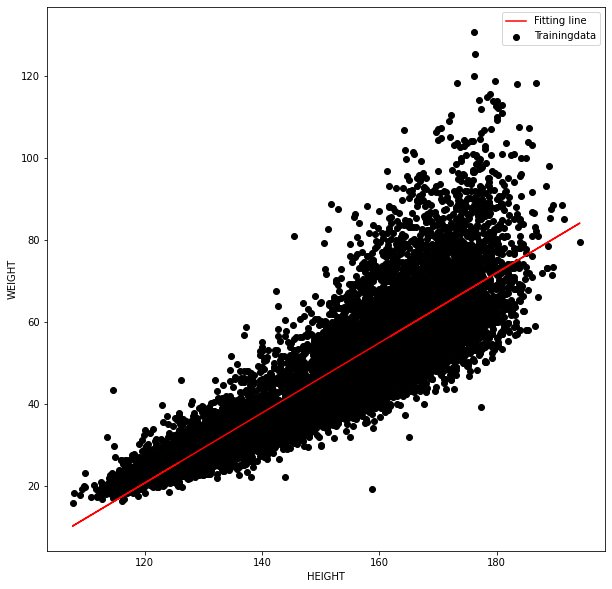

In [42]:
#시각화
#Task5. Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선을 그려보기

import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)


#Task 5-1. 입력값(키, 몸무게)를 산포도로 그리기 (x축=키, y축=몸무게)
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c = 'black', label = 'Trainingdata') #training data
plt.ylabel("WEIGHT")
plt.xlabel("HEIGHT")

#Task 5-2. w와 b값을 이용하여 직선 그리기 (산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함)
Y = torch.mm(W, x) + b
plt.plot(x[0], Y[0], c='#ff0000', label = 'Fitting line') #line

plt.legend()
plt.show()